In [1]:
import matplotlib.pyplot as plt
from scipy import signal as sgn
import numpy as np

## 1) 
    - 4 salınımlı bir sinüs dalgası oluşturun.
        Her periyotta L örnek olsun. (L*4 elemanlı bir vektör)
    - Bu sinyalin FFT ' sini alın ve genliğini çizdirin.

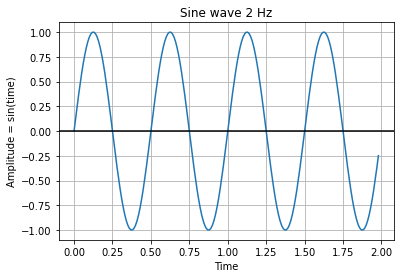

In [24]:
def sine_wave(f, overSampRate, phase=0, nCyl=4, plot=False):
	"""
	Generate sine wave signal with the following parameters
	Parameters:
		f : frequency of sine wave in Hertz
		overSampRate : oversampling rate (integer)
		phase : desired phase shift in radians
		nCyl : number of cycles of sine wave to generate
	Returns:
		(t,g) : time base (t) and the signal g(t) as tuple
	Example:
		f=10; overSampRate=30;
		phase = 1/3*np.pi;nCyl = 5;
		(t,g) = sine_wave(f,overSampRate,phase,nCyl)
	"""
	fs = overSampRate*f # sampling frequency
	time = np.arange(0, nCyl*1/f-1/fs, 1/fs) # time base
	amplitude = np.sin(2*np.pi*f*time+phase)
	
	if plot:
		#plt a sine wave using time and amplitude obtained for the sine wave
		plt.plot(time, amplitude)
		# Give a title for the sine wave plt
		plt.title(f'Sine wave {f} Hz')
		# Give x axis label for the sine wave plt
		plt.xlabel('Time')
		# Give y axis label for the sine wave plt
		plt.ylabel('Amplitude = sin(time)')

		plt.grid(True, which='both') 
		plt.axhline(y=0, color='k')
		# Display the sine wave
		plt.show()

	return (time, amplitude) # return time base and signal g(t) as tuple


time, amplitude = sine_wave(f=2, overSampRate=50, phase=0, nCyl=4, plot=True)

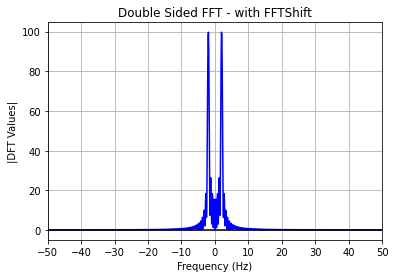

In [25]:
from scipy.fftpack import fft, fftshift

def get_fft(signal, fs, plot=False):

    NFFT=1024     
    X = fftshift(fft(signal, NFFT))
    fVals = np.arange(start = -NFFT/2, stop = NFFT/2)*fs/NFFT
    
    if plot:
        fig, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
        ax.plot(fVals, np.abs(X), 'b')
        ax.grid(True, which='both') 
        ax.axhline(y=0, color='k')
        
        ax.set_title('Double Sided FFT - with FFTShift')
        ax.set_xlabel('Frequency (Hz)')         
        ax.set_ylabel('|DFT Values|')
        ax.set_xlim(-50,50)
        ax.set_xticks(np.arange(-50, 50+10,10))
        plt.show()
        
    return (X,fVals)

fs = 50*2
X, fVals = get_fft(amplitude, fs, plot=True)

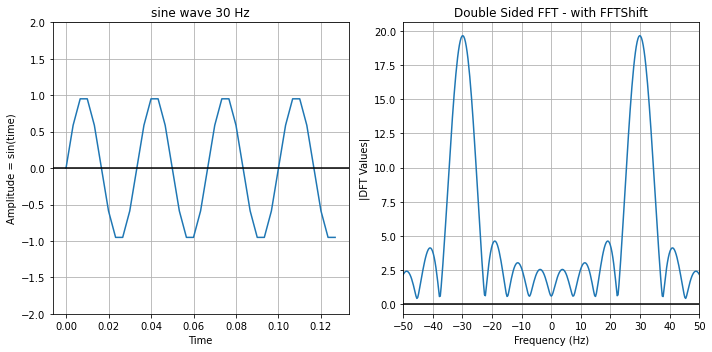

In [26]:
frequency = 30
overSampRate = 10

def plot_sine_wave_fft(f, overSampRate):
    time, amplitude = sine_wave(f=frequency, overSampRate=overSampRate, nCyl=4)

    fs = frequency*overSampRate
    X, fVals = get_fft(amplitude, fs, plot=False);

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    
    # Plot the square wave
    ax1.plot(time, amplitude)
    
    ax1.set_title(f'sine wave {frequency} Hz')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude = sin(time)')
    
    ax1.grid(True, which='both')
    ax1.axhline(y=0, color='k')
    ax1.set_ylim(-2,2)

    # Plot the FFT
    ax2.plot(fVals, np.abs(X))
    
    ax2.set_title('Double Sided FFT - with FFTShift')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('|DFT Values|')
   
    ax2.grid(True, which='both')
    ax2.axhline(y=0, color='k')

    ax2.set_xlim(-50,50)
    ax2.set_xticks(np.arange(-50, 50+10,10))

    fig.tight_layout()

    plt.show()

plot_sine_wave_fft(frequency, overSampRate)

## 2) 
    - Aynı işlemleri kare dalga için tekrarlayın. 

In [4]:
def square_wave(f, overSampRate, phase=0, nCyl=4, plot=False):
	"""
	Generate square wave signal with the following parameters
	Parameters:
		f : frequency of square wave in Hertz
		overSampRate : oversampling rate (integer)
		phase : desired phase shift in radians
		nCyl : number of cycles of square wave to generate
	Returns:
		(t,g) : time base (t) and the signal g(t) as tuple
	Example:
		f=10; overSampRate=30;
		phase = 1/3*np.pi;nCyl = 5;
		(t,g) = square_wave(f,overSampRate,phase,nCyl)
	"""

	time = np.arange(0, nCyl*1/f-1/fs, 1/fs) # time base
	amplitude = sgn.square(2*np.pi*f*time+phase) # replace with cos if a cosine wave is desired
	
	if plot:
		#plt a sine wave using time and amplitude obtained for the sine wave
		plt.plot(time, amplitude)
		# Give a title for the sine wave plt
		plt.title(f'Square wave {f} Hz')
		# Give x axis label for the sine wave plt
		plt.xlabel('Time')
		# Give y axis label for the sine wave plt
		plt.ylabel('Amplitude = sin(time)')

		plt.grid(True, which='both') 
		plt.axhline(y=0, color='k')
		plt.ylim(-2,2)
		# Display the sine wave
		plt.show()

	return (time, amplitude) # return time base and signal g(t) as tuple

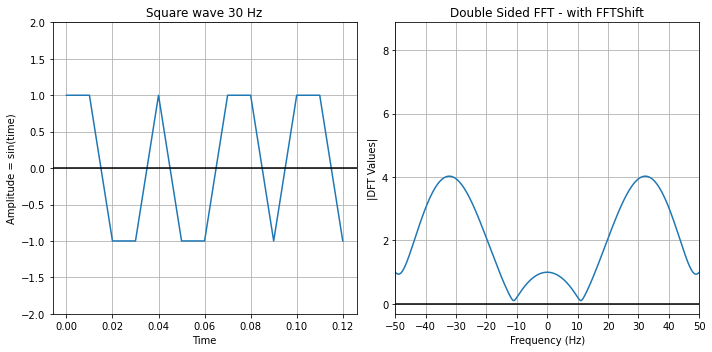

In [21]:
frequency = 30
overSampRate = 10

def plot_square_wave_fft(f, overSampRate):
    time, amplitude = square_wave(f=frequency, overSampRate=overSampRate, nCyl=4)

    fs = frequency*overSampRate
    X, fVals = get_fft(amplitude, fs, plot=False);

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    
    # Plot the square wave
    ax1.plot(time, amplitude)
    
    ax1.set_title(f'Square wave {frequency} Hz')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude = sin(time)')
    
    ax1.grid(True, which='both')
    ax1.axhline(y=0, color='k')
    ax1.set_ylim(-2,2)

    # Plot the FFT
    ax2.plot(fVals, np.abs(X))
    
    ax2.set_title('Double Sided FFT - with FFTShift')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('|DFT Values|')
   
    ax2.grid(True, which='both')
    ax2.axhline(y=0, color='k')

    ax2.set_xlim(-50,50)
    ax2.set_xticks(np.arange(-50, 50+10,10))

    fig.tight_layout()

    plt.show()

plot_square_wave_fft(frequency, overSampRate)

## Bonus:
    - 1 ve 2 deki sinyalleri farklı frekanslarında ödevi tekrarlayın.

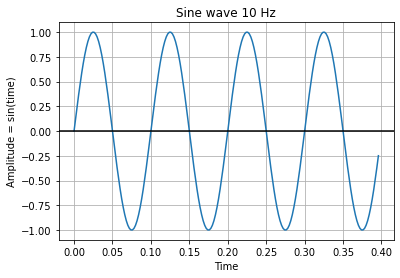

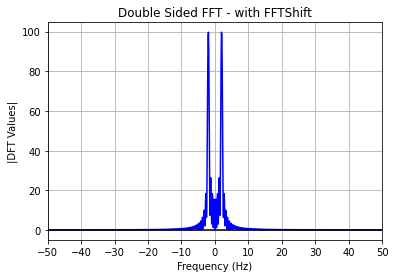

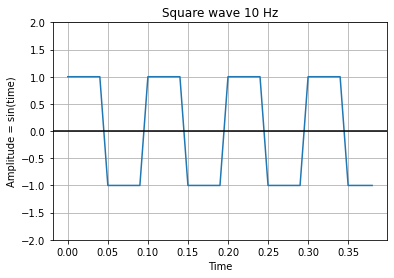

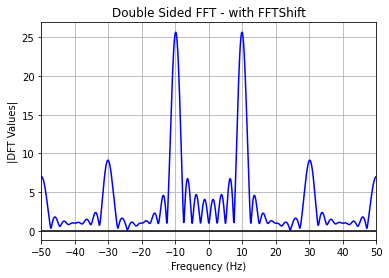

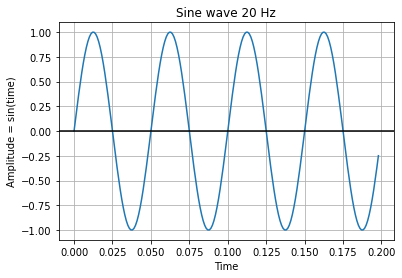

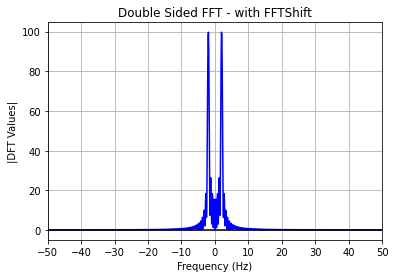

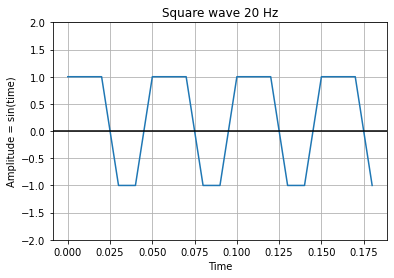

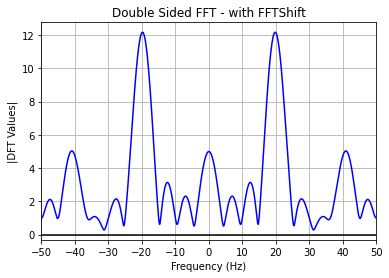

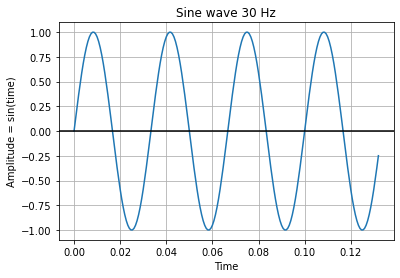

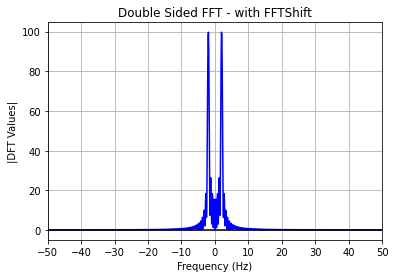

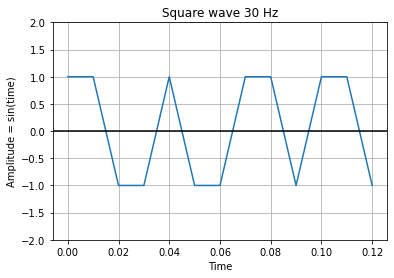

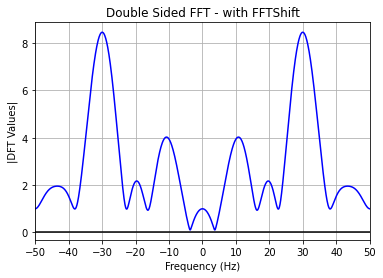

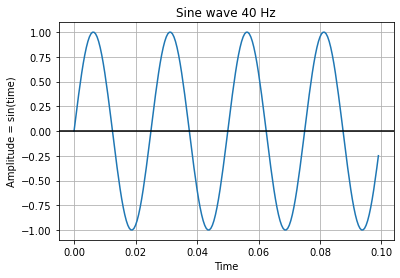

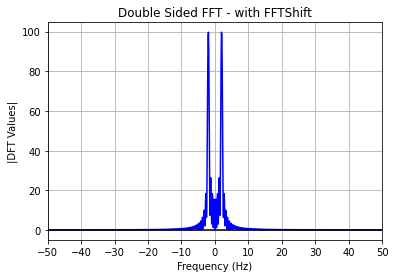

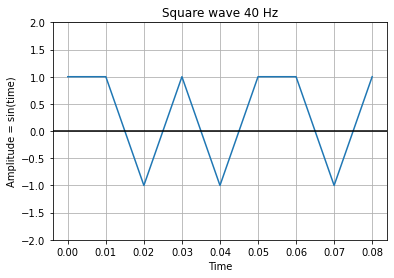

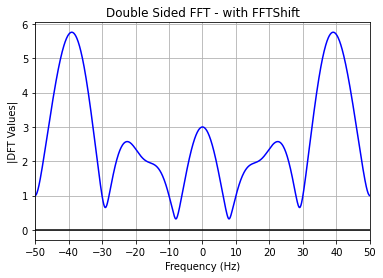

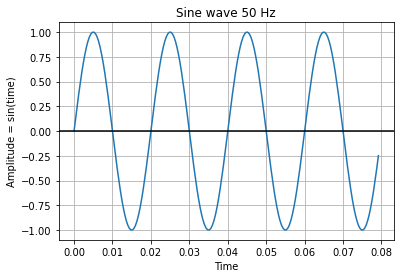

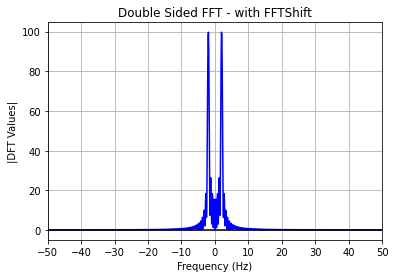

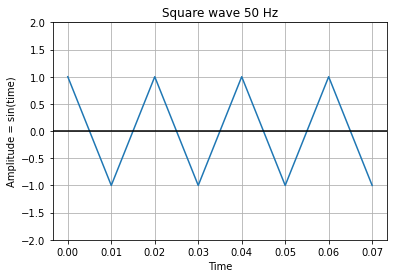

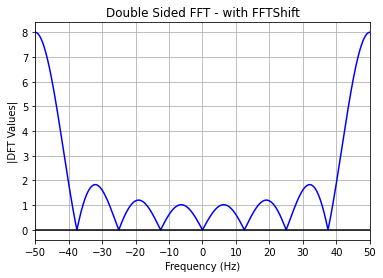

In [6]:
freqs = [10, 20, 30, 40, 50]

for freq in freqs:
    
    # Sine wave
    time, amplitude = sine_wave(f=freq, overSampRate=50, phase=0, nCyl=4, plot=True)
    X, fVals = get_fft(amplitude, fs, plot=True)
    
    # Square wave
    time, amplitude = square_wave(f=freq, overSampRate=50, phase=0, nCyl=4, plot=True)
    X, fVals = get_fft(amplitude, fs, plot=True)
